# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [78]:
# import numpy and pandas
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [79]:
# Run this code:
pokemon = pd.read_csv('/content/drive/MyDrive/[01] Data Analytics - IronHack/[06] Courses/Module 1/Week 3/Day 13 - Wednesday/[LAB 29] - Dataframe Calculations/Pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [80]:
# Your code here:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [81]:
# Your code here:
pokemon[["Legendary"]].value_counts().to_frame().rename(columns={0: "count"})

,count
Legendary,
False,735
True,65


Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [82]:
# Your code here:
group = pokemon.groupby("Legendary")[["Total"]].agg(["mean", "std"])
group

Total            
                 mean         std
Legendary                        
False      417.213605  106.760417
True       637.384615   60.937389

The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [83]:
# test codes
group.iloc[1][0]

637.3846153846154

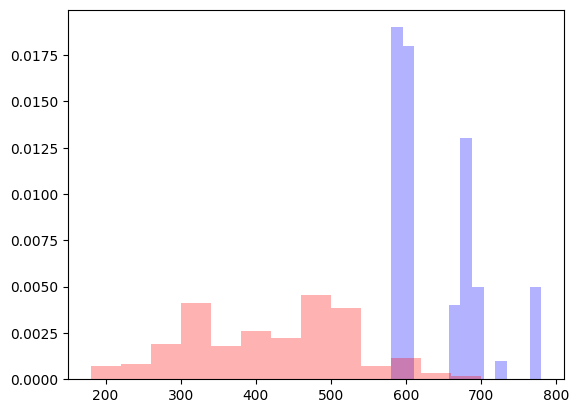

3.0952457469652825e-52

In [84]:
# Your code here:
legendary = pokemon[pokemon["Legendary"] == True]["Total"]
notLegendary = pokemon[pokemon["Legendary"] == False]["Total"]

plt.hist(legendary, alpha=.3, color='blue', bins=13, density=True, label="Legendary");
plt.hist(notLegendary, alpha=.3, color='red', bins=13, density=True, label="Non Legendary");
plt.show()

pvalue = stats.ttest_ind(legendary, notLegendary).pvalue
pvalue

What do you conclude from this test? Write your conclusions below.

In [85]:
# Your conclusions here:
if pvalue < 0.05:
    print(f"Reject H0: variance are equal, \npvalue of {pvalue} is higher than alpha of 0.05")
else:
    print(f"H0 not rejected: variance are not equal, \npvalue of {pvalue} is lower than alpha of 0.05")

Reject H0: variance are equal, 
pvalue of 3.0952457469652825e-52 is higher than alpha of 0.05


How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [86]:
# Your code here:
pokemon["Type 1"].value_counts().to_frame().rename(columns={"Type 1": "count"})

,count
Water,112
Normal,98
Grass,70
Bug,69
Psychic,57
Fire,52
Electric,44
Rock,44
Dragon,32
Ground,32


Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [87]:
# Your code here:
notWaterType = pokemon[pokemon["Type 1"] != "Water"][["Total"]].agg(["mean", "std"])
waterType = pokemon[pokemon["Type 1"] == "Water"][["Total"]].agg(["mean", "std"])
display(notWaterType, waterType)

,Total
mean,435.859012
std,121.091682


,Total
mean,430.455357
std,113.188266


In [88]:
# test code
notWaterType.iloc[0]

Total    435.859012
Name: mean, dtype: float64

Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [89]:
# Your code here:
pvalue = stats.ttest_ind(notWaterType.iloc[0], waterType.iloc[0]).pvalue
pvalue

<ipython-input-89-07a27f9ed3c7>:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  pvalue = stats.ttest_ind(notWaterType.iloc[0], waterType.iloc[0]).pvalue
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


nan

Write your conclusion below.

In [90]:
# Your conclusions here:
if pvalue < 0.05:
    print(f"Reject H0: variance are not equal, \npvalue of {pvalue} is higher than alpha of 0.05")
else:
    print(f"H0 not rejected: variance are equal, \npvalue of {pvalue} is lower than alpha of 0.05")

H0 not rejected: variance are equal, 
pvalue of nan is lower than alpha of 0.05


# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [91]:
# Your code here:


Describe the results of the test in the cell below.

In [92]:
# Your conclusions here:


We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [93]:
# Your code here:


Describe the results of the test in the cell below.

In [94]:
# Your conclusions here:


As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [95]:
# Your code here:


# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [96]:
# Your code here:
pokemonRarity = pokemon[["Legendary"]]
pokemonType = pokemon[["Type 1"]]

crosstab = stats.contingency.crosstab(pokemonRarity, pokemonType)
crosstab.count

array([[ 69,  29,  20,  40,  16,  27,  47,   2,  30,  67,  28,  22,  96,
         28,  43,  40,  23, 108],
       [  0,   2,  12,   4,   1,   0,   5,   2,   2,   3,   4,   2,   2,
          0,  14,   4,   4,   4]])

Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html).

In [97]:
# Your code here:
pvalue = stats.chi2_contingency(crosstab.count).pvalue
pvalue

5.118547414721704e-12

Based on a 95% confidence, should we reject the null hypothesis?

In [98]:
# Your answer here:
if pvalue < 0.05:
    print(f"Reject H0: variables are dependent, \npvalue of {pvalue} is higher than alpha of 0.05")
else:
    print(f"H0 not rejected: variables are independent, \npvalue of {pvalue} is lower than alpha of 0.05")

Reject H0: variables are dependent, 
pvalue of 5.118547414721704e-12 is higher than alpha of 0.05
